In [2]:
#!pip install keras
!pip uninstall tensorflow-metal

In [3]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import sklearn
import sklearn.datasets
import scipy

from PIL import Image
from scipy import ndimage

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

np.random.seed(7)
%matplotlib inline

In [4]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [5]:
training_data, validation_data, test_data = load_data()

In [6]:
def one_hot(j):
    # input is the target dataset of shape (1, m) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    # Look at the next block of code for a better understanding of one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [7]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, validation_inputs, validation_set_y)

In [8]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [9]:
train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T
test_set_y = test_set_y.T

In [10]:
train_set_x.shape

(50000, 784)

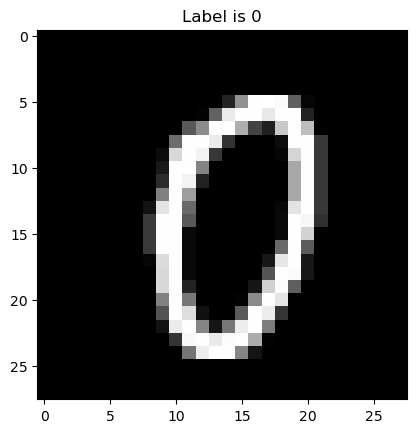

In [11]:
index  = 1000
k = train_set_x[index,:]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

In [19]:
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21,  activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

In [20]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
nn_model.fit(train_set_x, train_set_y, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 2s 467us/step - loss: 0.4986 - accuracy: 0.8459
Epoch 2/10
5000/5000 [==============================] - 2s 449us/step - loss: 0.3198 - accuracy: 0.9025
Epoch 3/10
5000/5000 [==============================] - 2s 460us/step - loss: 0.2885 - accuracy: 0.9121
Epoch 4/10
5000/5000 [==============================] - 2s 449us/step - loss: 0.2627 - accuracy: 0.9183
Epoch 5/10
5000/5000 [==============================] - 2s 445us/step - loss: 0.2530 - accuracy: 0.9208
Epoch 6/10
5000/5000 [==============================] - 2s 443us/step - loss: 0.2420 - accuracy: 0.9242
Epoch 7/10
5000/5000 [==============================] - 2s 457us/step - loss: 0.2327 - accuracy: 0.9271
Epoch 8/10
5000/5000 [==============================] - 2s 453us/step - loss: 0.2232 - accuracy: 0.9295
Epoch 9/10
5000/5000 [==============================] - 2s 446us/step - loss: 0.2195 - accuracy: 0.9314
Epoch 10/10
5000/5000 [==============================] - 2s 453u

In [22]:
scores_train = nn_model.evaluate(train_set_x, train_set_y)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_train[1]*100))

1563/1563 [==============================] - 0s 272us/step - loss: 0.1052 - accuracy: 0.9680

accuracy: 96.80%


In [23]:
predictions = nn_model.predict(test_set_x)
predictions = np.argmax(predictions, axis = 1)
predictions

313/313 [==============================] - 0s 250us/step


array([3, 8, 6, ..., 5, 6, 8])

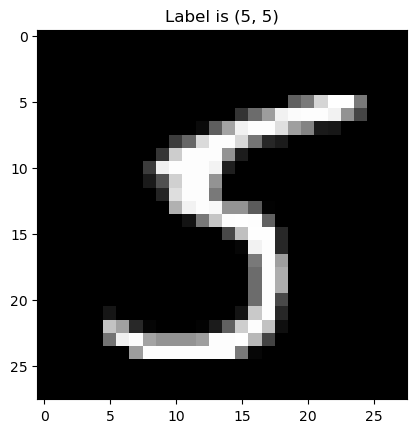

In [24]:
index  = 9997
k = test_set_x[index, :]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(predictions[index], np.argmax(test_set_y, axis = 1)[index])))
plt.imshow(k, cmap='gray')